In [260]:
import cv2
import numpy as np
from scipy import ndimage, signal
from matplotlib import pyplot as plt
import skimage
import pandas as pd
%matplotlib inline

In [263]:
raw_image = cv2.imread('../Klarity_Defect/Picture101.jpg',0) #0 for grayscale
image = cv2.resize(raw_image, (480,480))

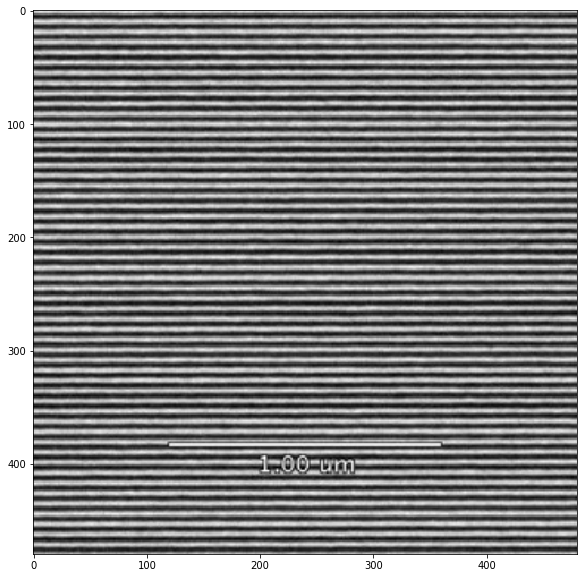

In [264]:
plt.figure(figsize=(10,10))
plt.imshow(image, cmap='gray')

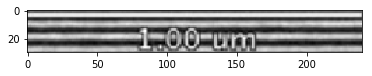

In [265]:
plt.imshow(image[380:410, 120:360], cmap='gray')

#length of the scale bar = 240 pixels

In [272]:
for i in range(380, 410):
    for j in range(100, 380):
        image[i][j] = image[i][0]

blur = cv2.GaussianBlur(image,(3,3),0)
ret,thresh = cv2.threshold(blur,0,1,cv2.THRESH_BINARY+cv2.THRESH_OTSU)  #Otsu's thresholding

#label every stripe
#thresh_label = measure.label(thresh, background=0)
thresh_img, thresh_label = ndimage.label(thresh)

"""
#measure line width in pixels
vertical_line = thresh_img[:,50]
p_num = 0 #count total pixels for white line
for i in range(0, 480):
    if vertical_line[i] != 0:
        p_num += 1
tot_line = np.max(vertical_line) #largest value in the line is the total number of lines

line_width = p_num/tot_line #average line width in pixels
line_dist = (480-p_num)/tot_line #average line distance in pixels

if line_width - int(line_width) > 0.5:
    line_width = int(line_width) + 1
else:
    line_width = int(line_width)

if line_dist - int(line_dist) > 0.5:
    line_dist = int(line_dist) + 1
else:
    line_dist = int(line_dist)
"""

line_width, line_dist = 4, 5

In [273]:
print(line_width, line_dist)

4 5


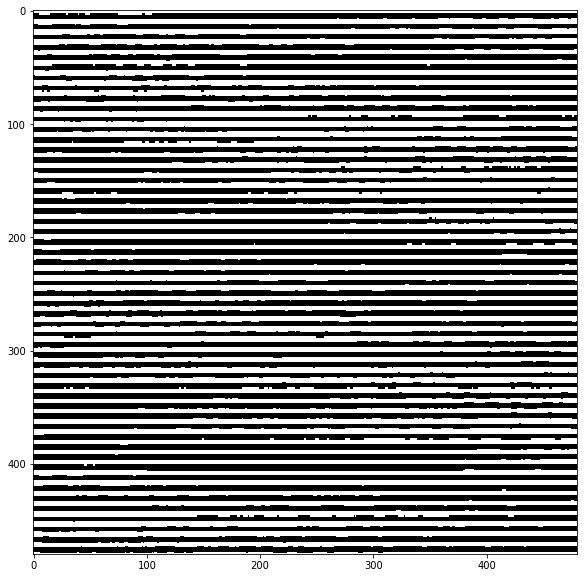

In [274]:
plt.figure(figsize=(10,10))
plt.imshow(thresh, cmap='gray')

In [275]:
line2 = np.ones(shape=(2*line_dist+line_width,1))

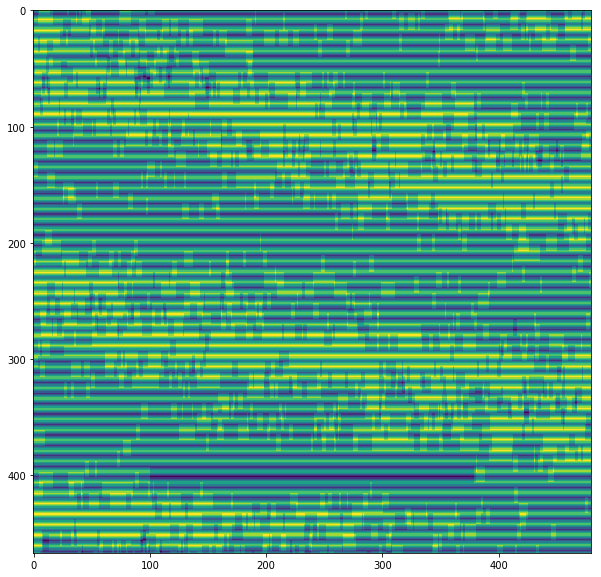

In [276]:
f = signal.convolve2d(thresh, line2, 'valid')

plt.figure(figsize=(10,10))
plt.imshow(f)

In [277]:
print(np.min(f), np.max(f))
print(f.shape)

3.0 10.0
(467, 480)


In [242]:
#np.where(f == np.min(f))
np.where(f<=2)

(array([350, 350, 350, 350, 350, 350, 350, 350, 350, 350, 350, 350, 350,
        350, 350, 350, 350, 350, 350, 351, 351, 351, 351, 351, 351, 351,
        351, 351, 351, 351, 351, 351, 351, 351, 351, 351, 351, 351, 352,
        352, 352, 352, 352, 352, 352, 352, 352, 352, 352, 352, 352, 352,
        352, 352, 352, 352, 352, 353, 353, 353, 353, 353, 353, 353, 353,
        353, 353, 353, 353, 353, 353, 353, 353, 353, 353, 353], dtype=int64),
 array([257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269,
        270, 271, 272, 273, 274, 275, 257, 258, 259, 260, 261, 262, 263,
        264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 257,
        258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270,
        271, 272, 273, 274, 275, 257, 258, 259, 260, 261, 262, 263, 264,
        265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275], dtype=int64))

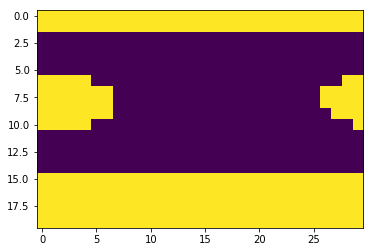

In [245]:
cut = thresh[350:370, 250:280]
#plt.figure(figsize=(4,4))
plt.imshow(cut)

In [246]:
np.sum(thresh[357,:])

461

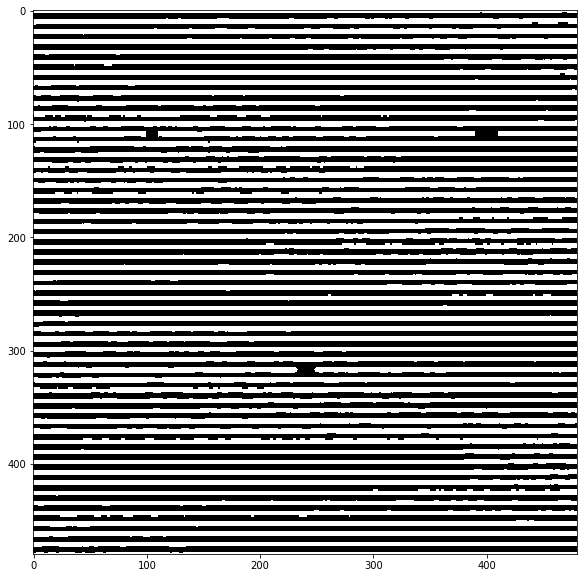

In [62]:
#print(thresh[100:120, 100:110])
thresh1 = thresh
thresh1[107:113, 100:110] = 0
thresh1[107:113, 390:410] = 0
plt.figure(figsize=(10,10))
plt.imshow(thresh1, cmap='gray')

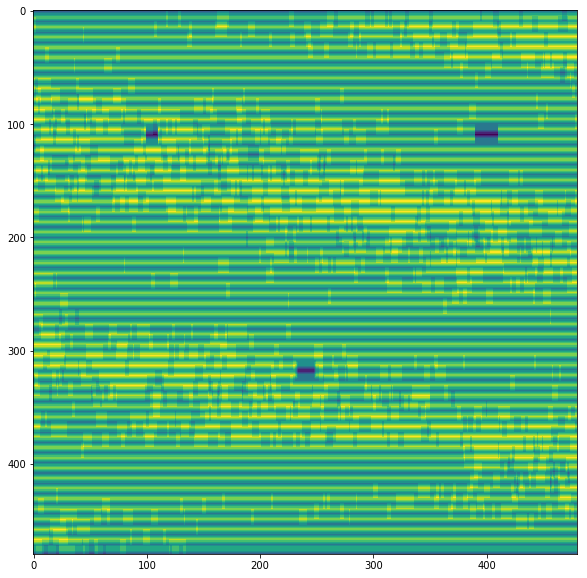

In [63]:
f1 = signal.convolve2d(thresh1, line2, 'same')

plt.figure(figsize=(10,10))
plt.imshow(f1)

#np.min(f1)
#np.where(f1 <= 1)

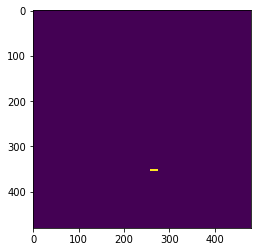

In [247]:
[row,col] = np.where(f<=2)
#row = np.where(f1<=1)[0]
#col = np.where(f1<=1)[1]
test = np.zeros((480,480))

for i in range(len(row)):
    test[row[i]][col[i]] = 1
    
plt.imshow(test)

In [248]:
test_img, test_label = ndimage.label(test)

In [249]:
test_label

1

In [250]:
count = [0]*test_label
#count

In [251]:
for i in range(0,480):
    record = [0]*test_label
    for j in range(0,480):
        if test_img[i][j] != 0:
            record[test_img[i][j]-1] += 1
    for k in range(test_label):
        count[k] = max(count[k], record[k])

In [252]:
count

[19]

In [253]:
a = [0,1,2,3]
for item in a:
    print(item)

0
1
2
3
